In [17]:
import pandas as pd

# Load data
csv_data = pd.read_csv('../data/plaid_transactions.csv')



In [18]:
# Inspect first few rows
print(csv_data.head())

# Get basic information
print(csv_data.info())


  transaction_id        date  amount          merchant category          city  \
0       txn78901  2023-12-27  317.99  Freelance Client   Income  Philadelphia   
1       txn78902  2023-05-01  117.66      Online Sales   Income  Philadelphia   
2       txn78903  2024-01-26  -87.58        Dining Out  Expense       Chicago   
3       txn78904  2024-01-26  308.40  Freelance Client   Income      New York   
4       txn78905  2023-09-28  309.03  Freelance Client   Income   Los Angeles   

  region payment_method  
0     PA  Bank Transfer  
1     PA  Bank Transfer  
2     IL    Credit Card  
3     NY  Bank Transfer  
4     CA  Bank Transfer  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  100 non-null    object 
 1   date            100 non-null    object 
 2   amount          96 non-null     float64
 3   merchant        100 non-

In [19]:
# Check for missing values
print(csv_data.isnull().sum())


transaction_id    0
date              0
amount            4
merchant          0
category          6
city              0
region            0
payment_method    0
dtype: int64


In [20]:
# Check data types
print(csv_data.dtypes)

# Convert data types
csv_data['date'] = pd.to_datetime(csv_data['date'])


transaction_id     object
date               object
amount            float64
merchant           object
category           object
city               object
region             object
payment_method     object
dtype: object


In [21]:
# Get statistical summary
print(csv_data.describe())



                      date      amount
count                  100   96.000000
mean   2023-08-11 14:24:00  107.684062
min    2023-01-01 00:00:00 -194.950000
25%    2023-05-01 00:00:00  -96.865000
50%    2023-08-29 00:00:00  -17.020000
75%    2023-11-27 00:00:00  316.880000
max    2024-02-25 00:00:00  498.690000
std                    NaN  223.684207


In [22]:
# Check for duplicates
print(csv_data.duplicated().sum())


# Drop duplicates
csv_data = csv_data.drop_duplicates()



0


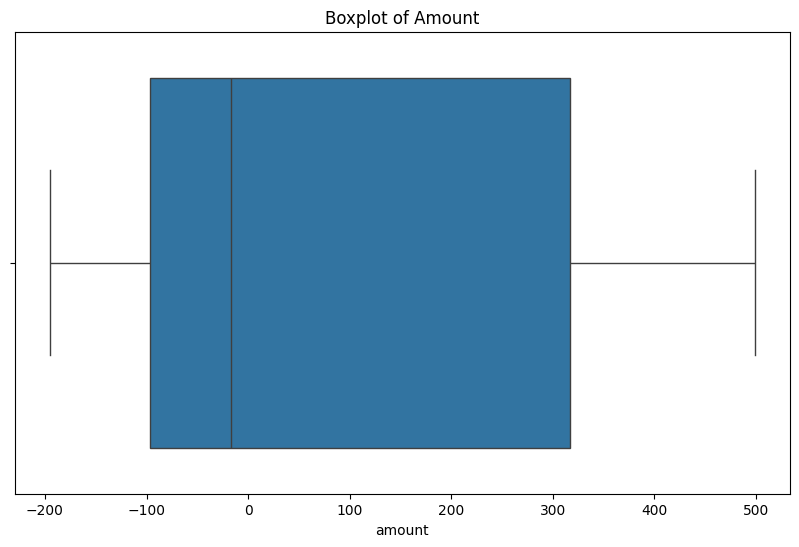

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=csv_data['amount'])
plt.title('Boxplot of Amount')
plt.show()

# Remove extreme outliers
csv_data = csv_data[csv_data['amount'].between(csv_data['amount'].quantile(0.01), csv_data['amount'].quantile(0.99))]


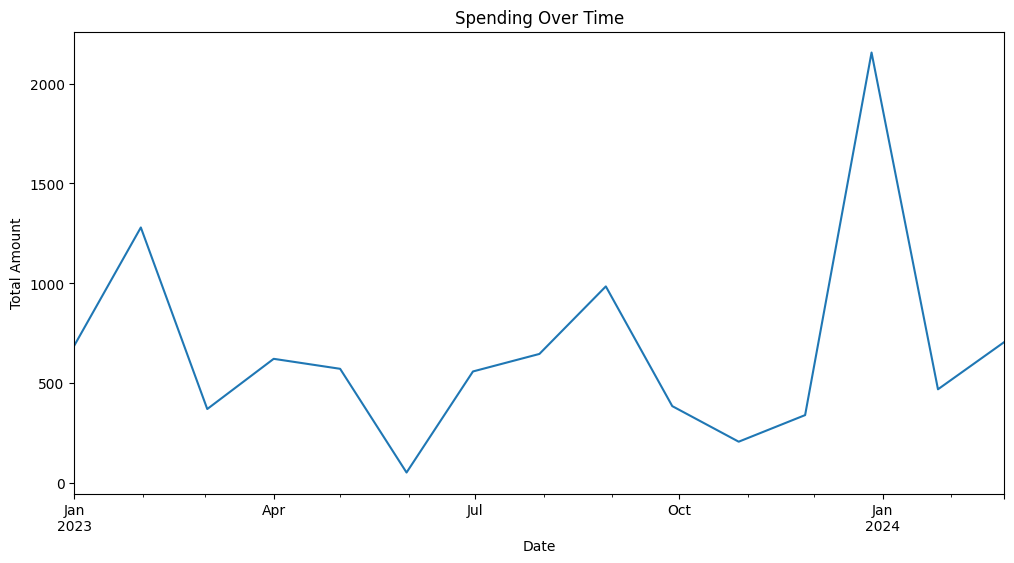

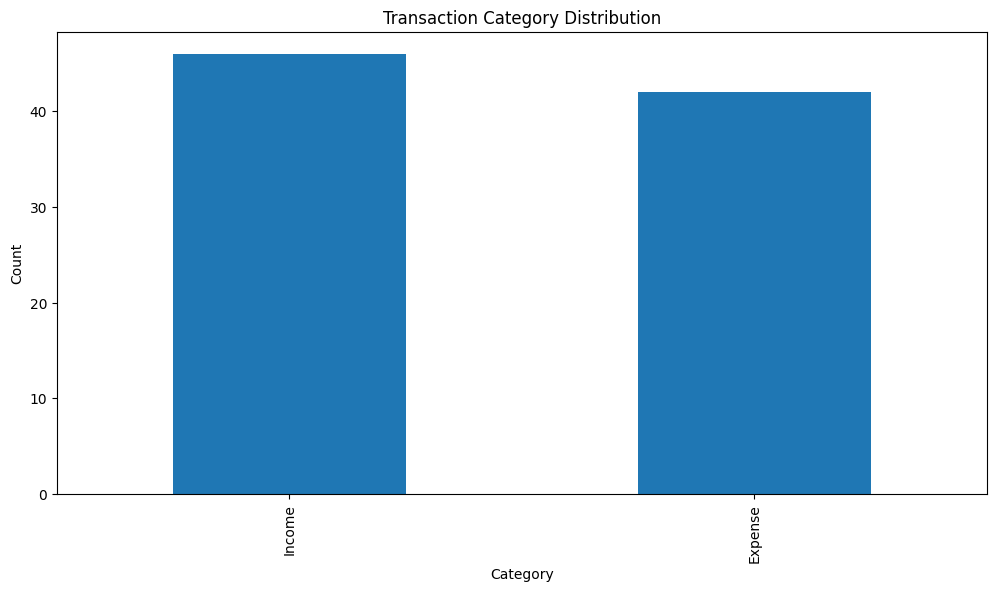

In [24]:
# Plot spending over time
plt.figure(figsize=(12, 6))
csv_data.groupby('date')['amount'].sum().plot()
plt.title('Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()

# Plot category distribution
plt.figure(figsize=(12, 6))
csv_data['category'].value_counts().plot(kind='bar')
plt.title('Transaction Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [25]:
# Number of unique city
print(csv_data['city'].unique())

['Philadelphia' 'Chicago' 'New York' 'Los Angeles' 'San Jose' 'San Diego'
 'San Antonio' 'Houston' 'Dallas' 'Phoenix']
